In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# --- Definisi Class Adaline ---
class Adaline:
    def __init__(self, learning_rate=0.01, epochs=1000, initial_weights=None):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = initial_weights
        self.bias = 0
        self.loss_history = []

    def activation(self, x):
        return x

    def predict(self, X):
        return self.activation(np.dot(X, self.weights) + self.bias)

    def train(self, X, y):
        n_samples, n_features = X.shape

        if self.weights is None:
            self.weights = np.zeros(n_features)

        for _ in range(self.epochs):
            y_pred = self.predict(X)
            errors = y - y_pred

            self.weights += self.learning_rate * np.dot(X.T, errors) / n_samples
            self.bias += self.learning_rate * errors.mean()

            mse = np.mean(errors ** 2)
            self.loss_history.append(mse)

In [3]:
# --- Proses Training ---
# Generate data polinomial: y = x^3 - 6x^2 + 11x - 6
coefficients = [1, -6, 11, -6]
X = np.linspace(-10, 10, 100).reshape(-1, 1)
y = np.polyval(coefficients, X.flatten())

In [5]:
# Inisialisasi dan training model
model = Adaline(learning_rate=0.01, epochs=1000, initial_weights=np.array([0.0]))
model.train(X, y)

In [6]:
# Prediksi satu nilai
y_pred = model.predict(X)

In [7]:
# Tampilkan info hasil
print(f"Bobot akhir: {model.weights}")
print(f"Bias akhir: {model.bias}")
print(f"Galat akhir (MSE): {model.loss_history[-1]:.4f}")

Bobot akhir: [72.20395878]
Bias akhir: -210.031336334155
Galat akhir (MSE): 57539.9002


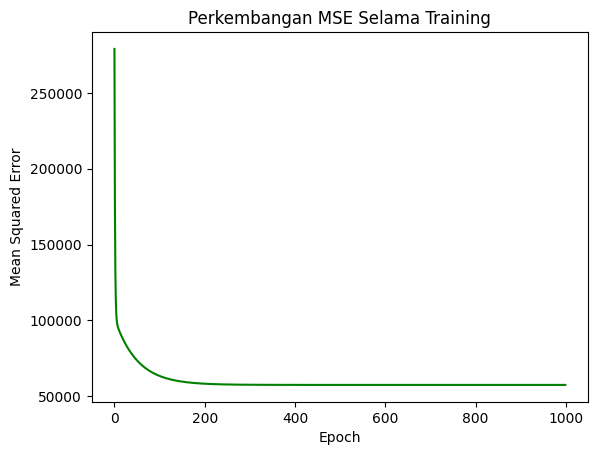

In [8]:
# Grafik MSE
plt.plot(model.loss_history, color='green')
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.title("Perkembangan MSE Selama Training")
plt.show()

In [10]:
#save model
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [11]:
from google.colab import files
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>